## Import Libs

In [1]:
path = '..'

In [2]:
import json
import csv

import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

nltk.download('stopwords')
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/salam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/salam/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/salam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
parts = ['part1', 'part2']

## Load Datasets

In [4]:
with open(path + '/dataset/en.json', 'r') as file:
    en_book = json.load(file)

In [5]:
with open(path+'/dataset/kaz.json', 'r') as file:
    kaz_book = json.load(file)

In [6]:
with open(path+'/dataset/ru.json', 'r') as file:
    ru_book = json.load(file)

In [7]:
def print_json_hierarchy(json_data, level=0):
    if isinstance(json_data, dict):
        for key, value in json_data.items():
            print('\t' * level + key)
            if isinstance(value, dict):
                print_json_hierarchy(value, level + 1)
    elif isinstance(json_data, list):
        for item in json_data:
            print('\t' * level + 'item')
            if isinstance(item, dict):
                print_json_hierarchy(item, level + 1)

In [8]:
kaz_nrc_data = pd.read_csv(path + '/dataset/Kazakh-NRC-EmoLex.txt', sep='\t')
ru_nrc_data = pd.read_csv(path + '/dataset/Russian-NRC-EmoLex.txt', sep='\t')

### Сontent of the Original Kazakh version

In [9]:
print_json_hierarchy(kaz_book)

chapters_in_kaz
	part1
		kaitkanda
		kat_kabatta
		zholda
		shytyrmanda
		bel_beleste
		orde
		kyiada
	part2
		zhailauda
		enyste
		okapta
		asuda
		tarauda
		biykte
		epilogue
part1
	kaitkanda
	kat_kabatta
	zholda
	shytyrmanda
	bel_beleste
	orde
	kyiada
part2
	zhailauda
	enyste
	okapta
	asuda
	tarauda
	biykte
	epilogue


### Сontent of the English version

In [10]:
print_json_hierarchy(en_book)

part1
	the_home_coming
	the_whirlwind
	on_the_road
	in_the_thickets
	along_the_foothills
	the_ascent
	in_the_heights
part2
	the_ford
	the_foothills
	over_the_ruts
	through_the_pass
	at_the_crossroads
	at_the_summit
	epilogue


### Сontent of the Russian version

In [11]:
print_json_hierarchy(ru_book)

part1
	возвращение
	в_вихре
	в_пути
	в_дебрях
	по_предгорьям
	на_подъеме
	в_вышине
part2
	перед_бродом
	на_жайляу
	взгорьями
	по_рытвинам
	на_перевале
	на_распутье
	эпилог


## Pre-Processing

In [12]:
def remove_stopwords(sentence: list[str], language: str):
    stop_words = set(stopwords.words(language))
    return [word for word in sentence if word.lower() not in stop_words]

### Remove Stop Words

In [13]:
books = {'english': en_book, 'kazakh': kaz_book, 'russian': ru_book}

In [14]:
for part in parts:
    for language in ['english', 'kazakh', 'russian']:
        book = books[language]
        for chapter in book[part]:
            for i in range(len(book[part][chapter])):
                sentence = book[part][chapter][i]
                sentence = remove_stopwords(sentence, language)
                book[part][chapter][i] = sentence

## Sentiment Analysis English Version

In [15]:
emotions_dict = {
    'anger': 1,
    'anticipation': 2,
    'disgust': 3,
    'fear': 4,
    'joy': 5,
    'negative': 6,
    'positive': 7,
    'sadness': 8,
    'surprise': 9,
    'trust': 10
}

In [16]:
def plot_sentiment(sentiment_scores: dict, part1_chapters: list["str"], part2_chapters: list["str"], y_min: int, y_max: int):
    fig, axs = plt.subplots(1, 14, figsize=(25, 3))

    for i in range(7):
        axs[i].plot(sentiment_scores['part1'][part1_chapters[i]])
        axs[i].set_title(part1_chapters[i])
        axs[i].set_ylim([y_min, y_max])
        if i != 0:
            axs[i].set_yticks([])
        axs[i+7].plot(sentiment_scores['part2'][part2_chapters[i]])
        axs[i+7].set_title(part2_chapters[i])
        axs[i+7].set_ylim([y_min, y_max])
        axs[i+7].set_yticks([])

    plt.show()

In [17]:
kaz_nrc_data

,English Word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,Kazakh Word
0,aback,0,0,0,0,0,0,0,0,0,0,таң қалды
1,abacus,0,0,0,0,0,0,0,0,0,1,абакус
2,abandon,0,0,0,1,0,1,0,1,0,0,тастау
3,abandoned,1,0,0,1,0,1,0,1,0,0,тастап кеткен
4,abandonment,1,0,0,1,0,1,0,1,1,0,бас тарту
...,...,...,...,...,...,...,...,...,...,...,...,...
14149,zone,0,0,0,0,0,0,0,0,0,0,аймақ
14150,zoo,0,0,0,0,0,0,0,0,0,0,хайуанаттар бағы
14151,zoological,0,0,0,0,0,0,0,0,0,0,зоологиялық
14152,zoology,0,0,0,0,0,0,0,0,0,0,зоология


### Using AFINN

In [18]:
def preprocess_nrc_data(nrc_data, lang):
    sentiment_dict = {}
    for index, row in nrc_data.iterrows():
        word = row[lang]
        negative = row['negative']
        positive = row['positive']
        sentiment_dict[word] = (negative, positive)
    return sentiment_dict

In [19]:
def get_sentiment(sentiment_dict, sentence: list[str]):
    sentiment_scores = []
    for word in sentence:
        if word in sentiment_dict:
            negative, positive = sentiment_dict[word]
            if negative > 0:
                sentiment_scores.append(-1)
            elif positive > 0:
                sentiment_scores.append(1)
            else:
                sentiment_scores.append(0)
        else:
            sentiment_scores.append(0)
    return sentiment_scores

In [20]:
kaz_sentiment_dict = preprocess_nrc_data(kaz_nrc_data, "Kazakh Word")
en_sentiment_dict = preprocess_nrc_data(kaz_nrc_data, "English Word")
ru_sentiment_dict = preprocess_nrc_data(ru_nrc_data, "Russian Word")

In [21]:
en_sentiment = {}

for part in parts:
    en_sentiment[part] = {}
    book = books['english']
    for chapter in book[part]:
        en_sentiment[part][chapter] = []
        for sentence in book[part][chapter]:
            sentiment = get_sentiment(en_sentiment_dict, sentence)
            if not np.isnan(np.mean(sentiment)):
              en_sentiment[part][chapter].append(np.mean(sentiment))
            else:
              en_sentiment[part][chapter].append(0)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [22]:
chapter1 = ['the_home_coming', 'the_whirlwind', 'on_the_road', 'in_the_thickets', 'along_the_foothills', 'the_ascent', 'in_the_heights']
chapter2 = ['the_ford', 'the_foothills', 'over_the_ruts', 'through_the_pass', 'at_the_crossroads', 'at_the_summit', 'epilogue']

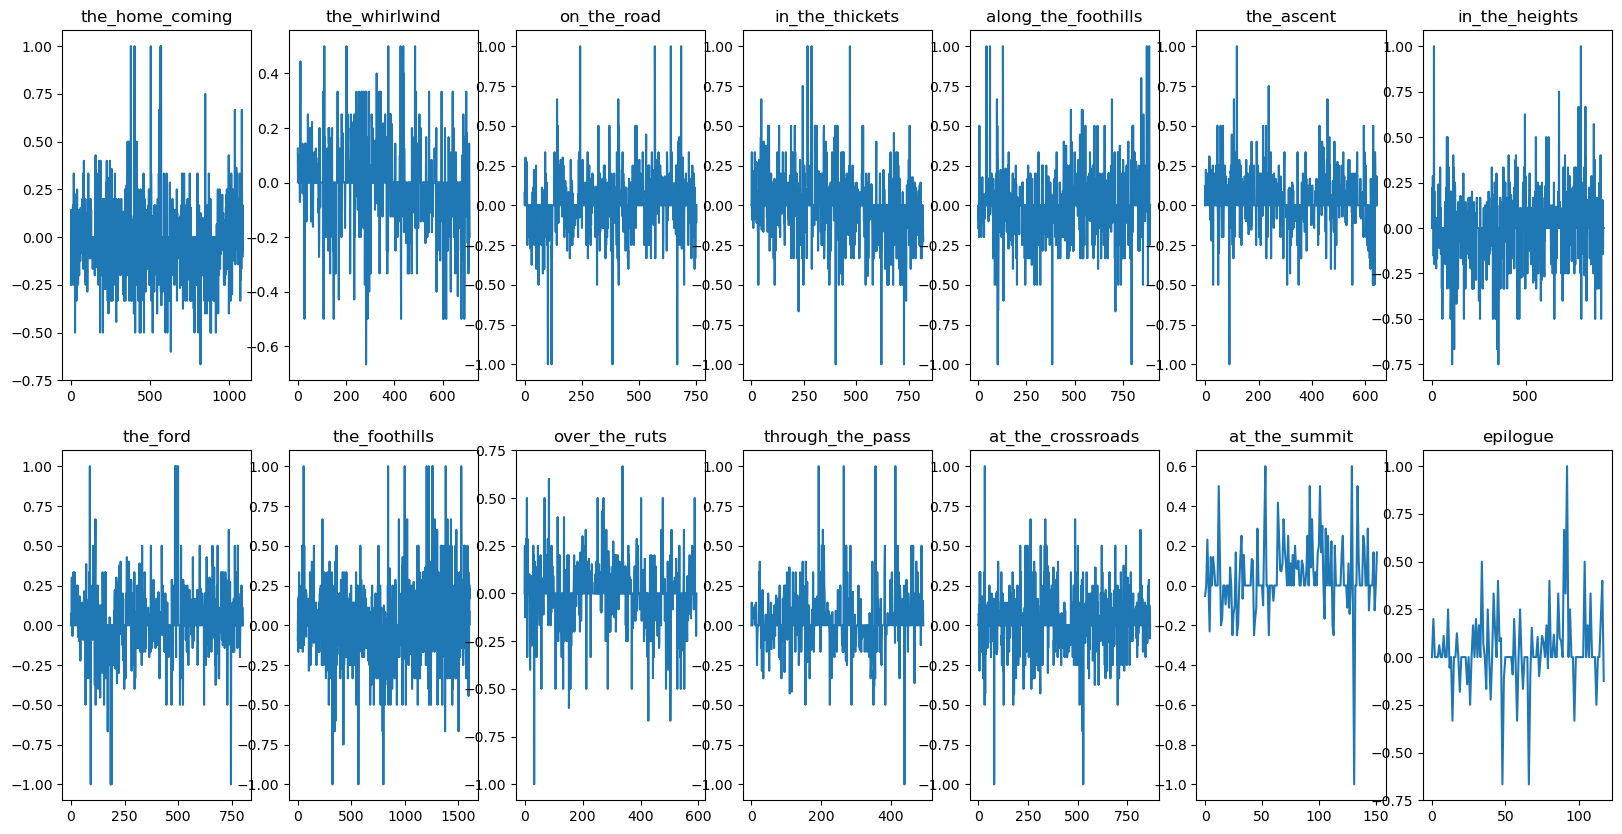

In [23]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))

for i in range(7):
    axs[0, i].plot(en_sentiment['part1'][chapter1[i]])
    axs[0, i].set_title(chapter1[i])
    axs[1, i].plot(en_sentiment['part2'][chapter2[i]])
    axs[1, i].set_title(chapter2[i])

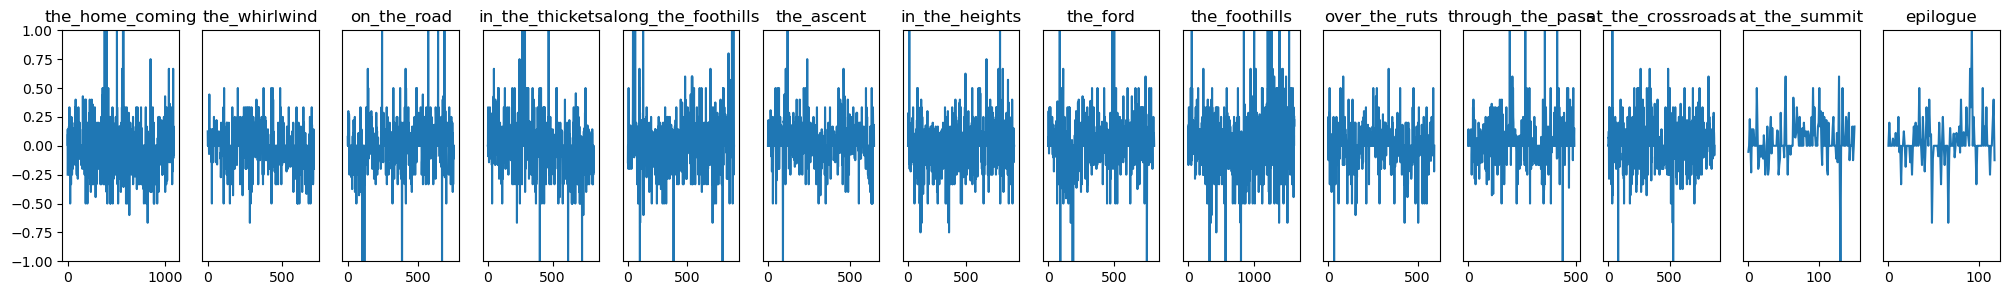

In [24]:
y_min = min([min(en_sentiment['part1'][chapter]) for chapter in chapter1] + [min(en_sentiment['part2'][chapter]) for chapter in chapter2])
y_max = max([max(en_sentiment['part1'][chapter]) for chapter in chapter1] + [max(en_sentiment['part2'][chapter]) for chapter in chapter2])
plot_sentiment(en_sentiment, chapter1, chapter2, y_min, y_max)

In [25]:
en_sentiment_mean = {}

for part in parts:
    en_sentiment_mean[part] = {}
    for chapter in en_sentiment[part].keys():
      en_sentiment_mean[part][chapter] = np.mean(en_sentiment[part][chapter])

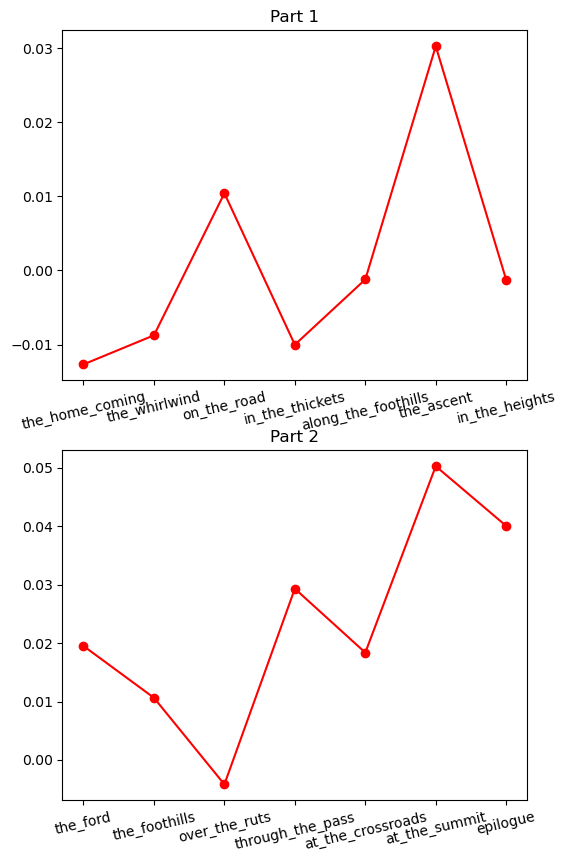

In [26]:
fig, axs = plt.subplots(2, 1, figsize=(6, 10))

axs[0].plot(en_sentiment_mean['part1'].keys(), en_sentiment_mean['part1'].values(), color='red', marker='o')
axs[0].xaxis.set_tick_params(rotation=13)
axs[0].set_title('Part 1')

axs[1].plot(en_sentiment_mean['part2'].keys(), en_sentiment_mean['part2'].values(), color='red', marker='o')
axs[1].xaxis.set_tick_params(rotation=13)
axs[1].set_title('Part 2')
plt.show()

In [27]:
en_sentiment_mean

{'part1': {'the_home_coming': -0.012683497411580369,
  'the_whirlwind': -0.008759014062888353,
  'on_the_road': 0.010417204987976754,
  'in_the_thickets': -0.010027465463674072,
  'along_the_foothills': -0.0012166496366979853,
  'the_ascent': 0.030260101946740395,
  'in_the_heights': -0.0012771300640125865},
 'part2': {'the_ford': 0.01950720416566005,
  'the_foothills': 0.010639425068509541,
  'over_the_ruts': -0.004182603948374338,
  'through_the_pass': 0.029313426534303737,
  'at_the_crossroads': 0.01836796300245002,
  'at_the_summit': 0.05027452781521341,
  'epilogue': 0.04004876429215255}}

In [28]:
chapter_sentiments = [sentence for chapter in en_sentiment['part1'].values() for sentence in chapter]
chapter_sentiments += [sentence for chapter in en_sentiment['part2'].values() for sentence in chapter]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


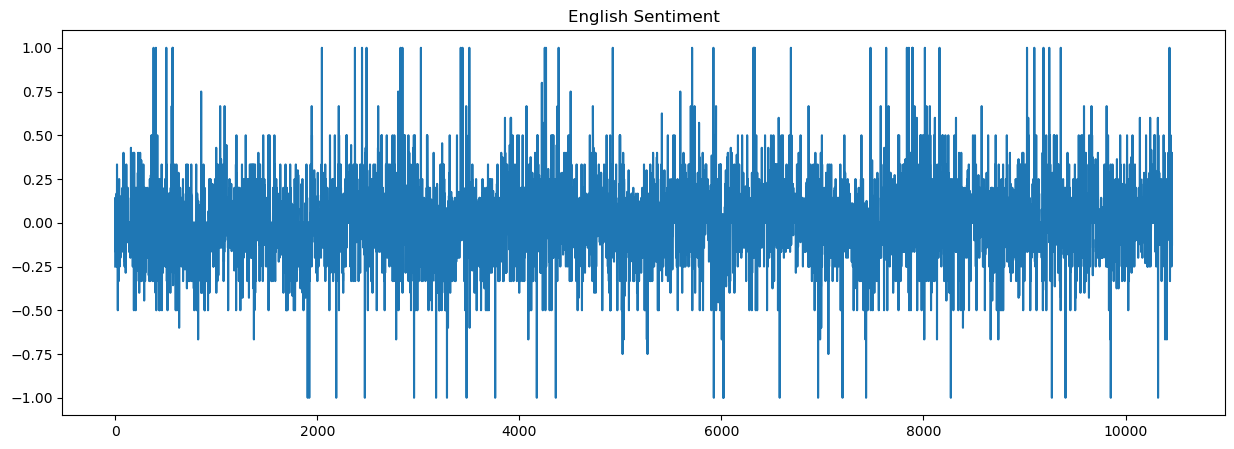

In [29]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=chapter_sentiments)
plt.title('English Sentiment')
plt.show()

## Sentiment Analysis Russian Version

In [30]:
ru_sentiment = {}

for part in parts:
    ru_sentiment[part] = {}
    book = books['russian']
    for chapter in book[part]:
        ru_sentiment[part][chapter] = []
        for sentence in book[part][chapter]:
            sentiment = get_sentiment(ru_sentiment_dict, sentence)
            if not np.isnan(np.mean(sentiment)):
              ru_sentiment[part][chapter].append(np.mean(sentiment))
            else:
              ru_sentiment[part][chapter].append(0)

/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [31]:
ru_part1_chapters = [chapter for chapter in ru_sentiment['part1'].keys()]
ru_part2_chapters = [chapter for chapter in ru_sentiment['part2'].keys()]

In [32]:
ru_sentiment_mean = {}

for part in parts:
    ru_sentiment_mean[part] = {}
    for chapter in ru_sentiment[part].keys():
      ru_sentiment_mean[part][chapter] = np.mean(ru_sentiment[part][chapter])

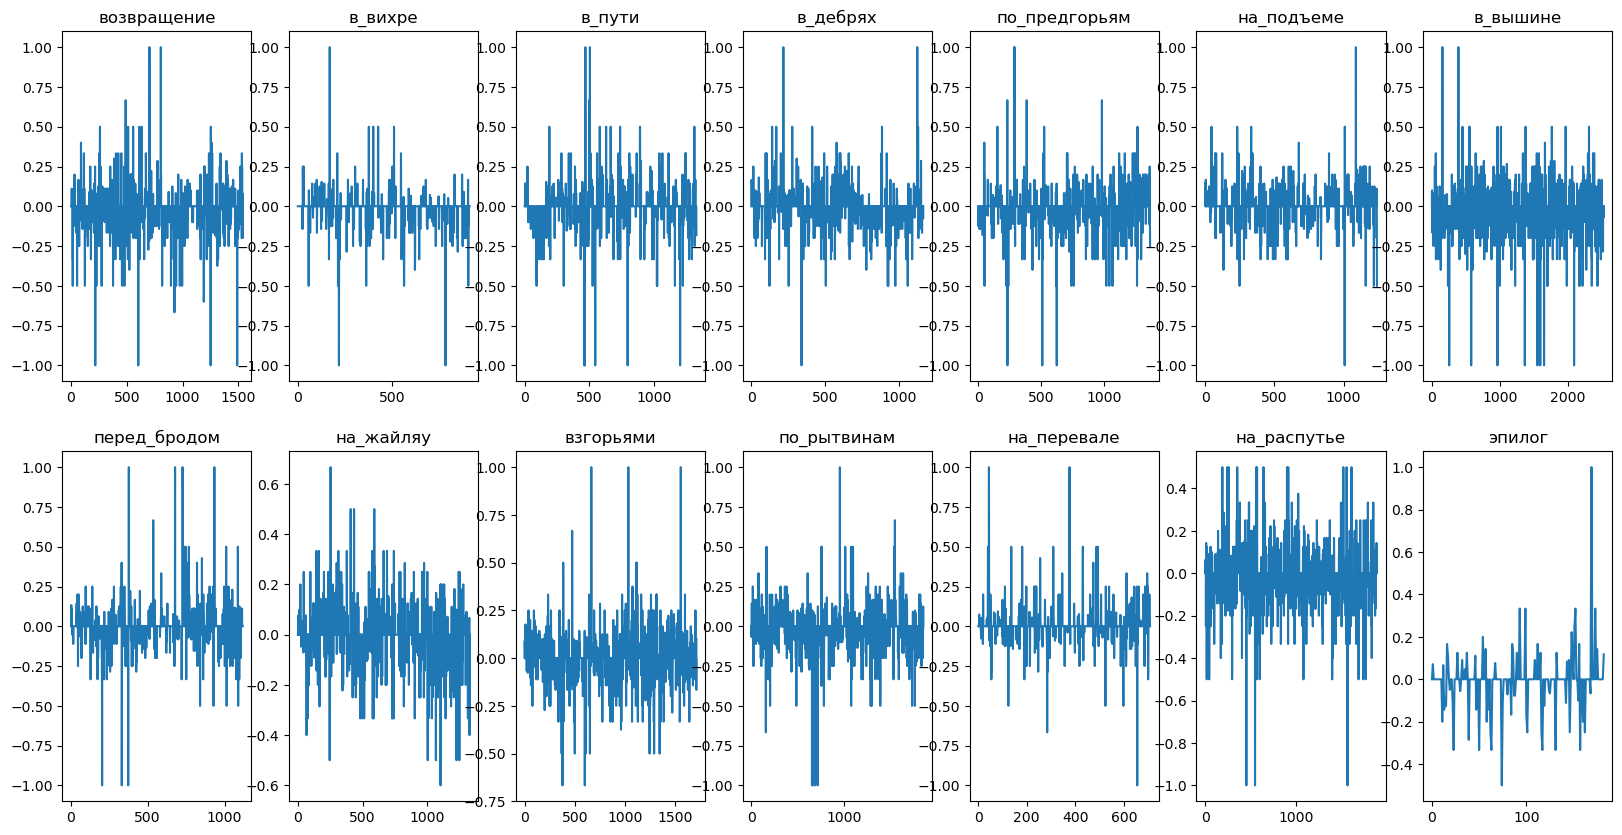

In [33]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))

for i in range(7):
    axs[0, i].plot(ru_sentiment['part1'][ru_part1_chapters[i]])
    axs[0, i].set_title(ru_part1_chapters[i])
    axs[1, i].plot(ru_sentiment['part2'][ru_part2_chapters[i]])
    axs[1, i].set_title(ru_part2_chapters[i])

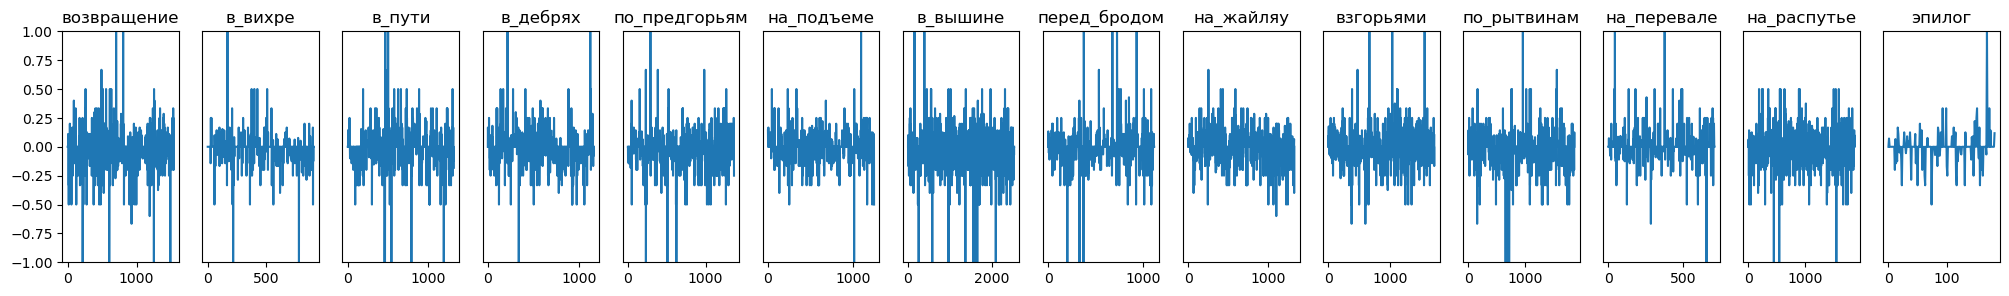

In [34]:
plot_sentiment(ru_sentiment, ru_part1_chapters, ru_part2_chapters, -1, 1)

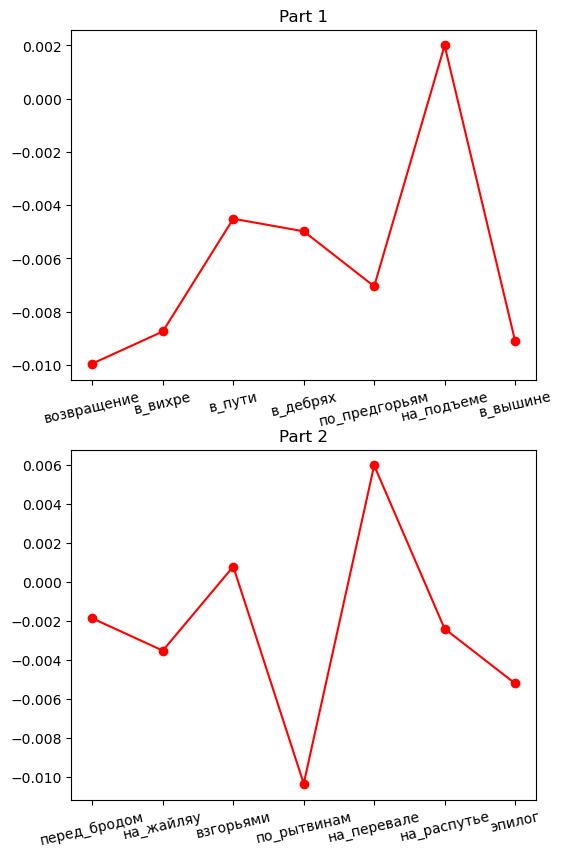

In [35]:
fig, axs = plt.subplots(2, 1, figsize=(6, 10))

axs[0].plot(ru_sentiment_mean['part1'].keys(), ru_sentiment_mean['part1'].values(), color='red', marker='o')
axs[0].xaxis.set_tick_params(rotation=13)
axs[0].set_title('Part 1')

axs[1].plot(ru_sentiment_mean['part2'].keys(), ru_sentiment_mean['part2'].values(), color='red', marker='o')
axs[1].xaxis.set_tick_params(rotation=13)
axs[1].set_title('Part 2')
plt.show()

## Sentiment Analysis Original Kazakh Version

In [36]:
kaz_sentiment = {}

for part in parts:
    kaz_sentiment[part] = {}
    book = books['kazakh']
    for chapter in book[part]:
        kaz_sentiment[part][chapter] = []
        for sentence in book[part][chapter]:
            sentiment = get_sentiment(kaz_sentiment_dict, sentence)
            if not np.isnan(np.mean(sentiment)):
              kaz_sentiment[part][chapter].append(np.mean(sentiment))
            else:
              kaz_sentiment[part][chapter].append(0)

In [37]:
kaz_sentiment_mean = {}

for part in parts:
    kaz_sentiment_mean[part] = {}
    for chapter in kaz_sentiment[part].keys():
      kaz_sentiment_mean[part][chapter] = np.mean(kaz_sentiment[part][chapter])

In [38]:
kaz_part1_chapters = [chapter for chapter in kaz_sentiment['part1'].keys()]
kaz_part2_chapters = [chapter for chapter in kaz_sentiment['part2'].keys()]

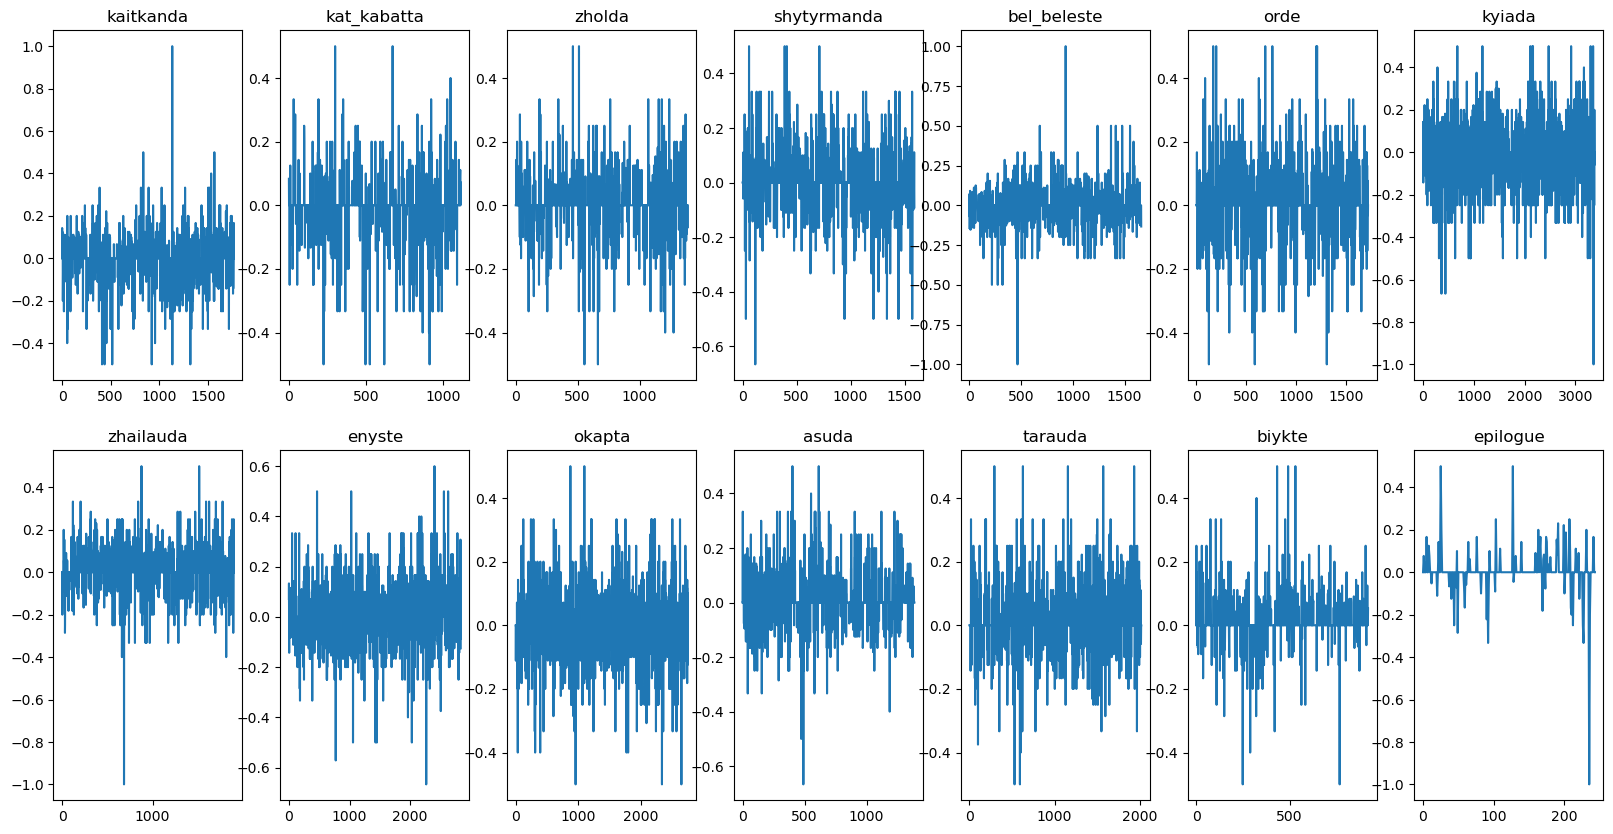

In [39]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))

for i in range(7):
    axs[0, i].plot(kaz_sentiment['part1'][kaz_part1_chapters[i]])
    axs[0, i].set_title(kaz_part1_chapters[i])
    axs[1, i].plot(kaz_sentiment['part2'][kaz_part2_chapters[i]])
    axs[1, i].set_title(kaz_part2_chapters[i])

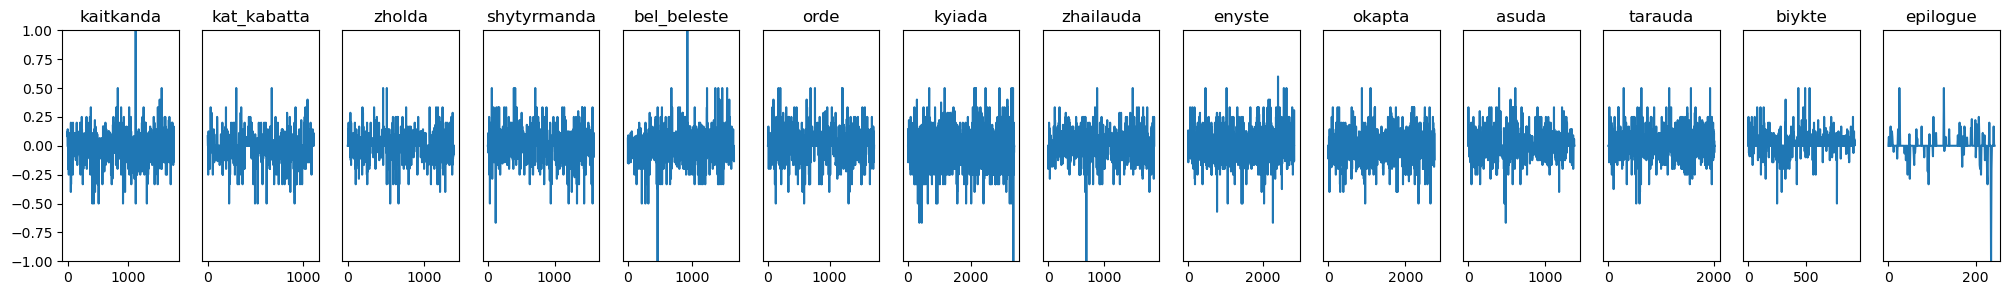

In [40]:
plot_sentiment(kaz_sentiment, kaz_part1_chapters, kaz_part2_chapters, -1, 1)

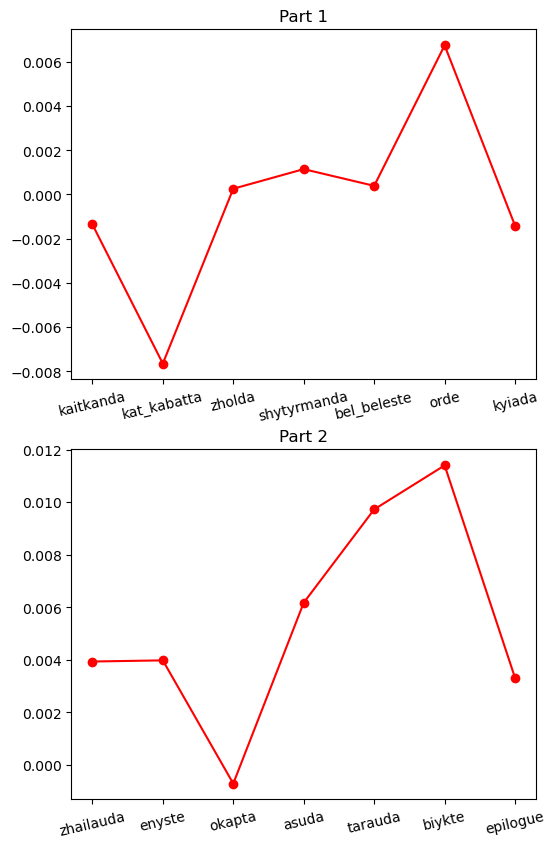

In [41]:
fig, axs = plt.subplots(2, 1, figsize=(6, 10))


axs[0].plot(kaz_sentiment_mean['part1'].keys(), kaz_sentiment_mean['part1'].values(), color='red', marker='o')
axs[0].xaxis.set_tick_params(rotation=13)
axs[0].set_title('Part 1')

axs[1].plot(kaz_sentiment_mean['part2'].keys(), kaz_sentiment_mean['part2'].values(), color='red', marker='o')
axs[1].xaxis.set_tick_params(rotation=13)
axs[1].set_title('Part 2')
plt.show()